In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as re
import scipy.stats as stats 
from scipy.stats import linregress

df_dog_rates = pd.read_csv('dog_rates_tweets.csv')
df_dog_rates['created_at'] = pd.to_datetime(df_dog_rates['created_at'], format='mixed', utc=True)
df_dog_rates

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44+00:00,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02+00:00,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56+00:00,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03+00:00,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40+00:00,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
14923,1273020398150414336,2020-06-16 22:31:29+00:00,@annacroweVO wait... https://t.co/lhCKSMfpfK
14924,1273020243196235777,2020-06-16 22:30:52+00:00,@friendlyrmndr we consulted canadians before p...
14925,1273019594601639938,2020-06-16 22:28:17+00:00,I know it’s been a while but we still only rat...
14926,1272937849118011392,2020-06-16 17:03:27+00:00,@Harry_Styles this is Sophie and she told me t...


In [3]:
def find_rate(text):
    pattern = r'(\d+(\.\d+)?)/10'
    res = re.search(pattern, text)
    if res:
        return float(res.group(1))  # return first part of matched result (eg: 15 in 15/10)  if matched
    return res  # return None if not matched


df_dog_rates['rating'] = df_dog_rates['text'].apply(find_rate)
df_dog_filtered_rates = df_dog_rates[(df_dog_rates['rating'].notnull() == True) & (df_dog_rates['rating'] <= 25)].copy()  # keep true rates and <= 25 only remove
df_dog_filtered_rates

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56+00:00,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07+00:00,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58+00:00,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48+00:00,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39+00:00,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,14.0
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,13.0
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,13.0
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,12.0


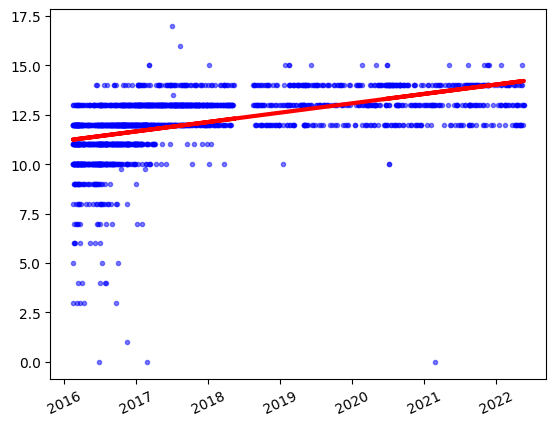

In [4]:
def to_timestamp(date):
    return date.timestamp()


df_dog_filtered_rates['timestamp'] = df_dog_filtered_rates['created_at'].apply(to_timestamp)
fit = linregress(x=df_dog_filtered_rates['timestamp'], y=df_dog_filtered_rates['rating'])

df_dog_filtered_rates['prediction_y_value'] = df_dog_filtered_rates['timestamp'] * fit.slope + fit.intercept

plt.xticks(rotation=25)
plt.plot(df_dog_filtered_rates['created_at'], df_dog_filtered_rates['rating'], 'b.', alpha=0.5)
plt.plot(df_dog_filtered_rates['created_at'], df_dog_filtered_rates['prediction_y_value'], 'r-', linewidth=3)
plt.show()

In [5]:
fit.slope

1.5000503986105543e-08

In [6]:
fit.intercept

-10.585967528906664

In [7]:
fit.pvalue

2.6070388139665156e-127

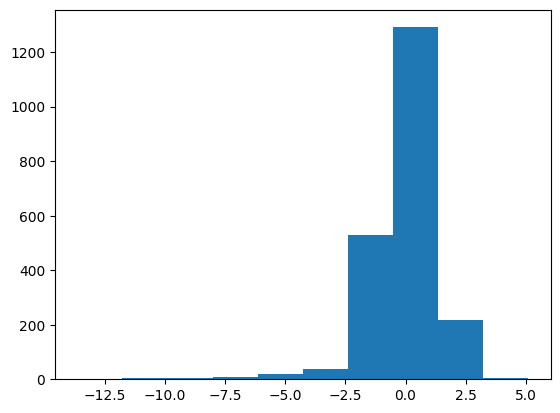

In [8]:
from scipy.stats import normaltest

residuals = df_dog_filtered_rates['rating'] - df_dog_filtered_rates['prediction_y_value']
plt.hist(residuals)
plt.show()

# print(normaltest(residuals).pvalue)
